# Reported Data Analysis
## Introduction

This notebook aims to analyze crime data reported in Sweden. The dataset, `reported.csv`, contains information on various types of crimes over different time periods. This analysis will help me understand the temporal and geographical patterns of crime in Sweden and compare them with crime data from other regions like New York and London.

## Dataset Description

### reported.csv

The `reported.csv` file contains detailed information about crimes reported in Sweden. Each row in the dataset represents a specific crime report with various attributes describing the nature of the crime, the time it was reported, and other relevant details.

### Key Attributes:
- **Region/Country/Area**: The geographical location where the crime was reported.
- **Year**: The year when the crime was reported.
- **Crime Type**: The type of crime reported (e.g., theft, assault, vandalism).
- **Crime Count**: The number of incidents reported for the specific crime type in the given year and location.
- **Other Attributes**: Additional attributes that provide more context or details about the crime reports.

## Objectives

The main objectives of analyzing the `reported.csv` dataset are:
1. **Temporal Analysis**: Understand how crime rates vary over time in Sweden. Identify any seasonal or yearly patterns.
2. **Geographical Analysis**: Explore which regions in Sweden have higher crime rates and identify any geographical patterns.
3. **Comparative Analysis**: Compare the crime patterns in Sweden with those in New York and London to identify similarities and differences.
4. **Predictive Modeling**: Develop predictive models to forecast future crime rates based on historical data.
5. **Clustering and Pattern Recognition**: Use clustering techniques to identify crime hotspots and similar patterns across different regions.

## Methodology

1. **Data Collection and Cleaning**:
   - Load and clean the `reported.csv` dataset.
   - Handle missing values and normalize the data.

2. **Exploratory Data Analysis (EDA)**:
   - Conduct basic statistical analysis.
   - Visualize the data to identify trends and patterns.

3. **Supervised Learning**:
   - Apply regression techniques to predict future crime rates.
   - Use classification methods to categorize crime severity or types.

4. **Unsupervised Learning**:
   - Apply clustering algorithms to identify crime hotspots and similar patterns.

5. **Comparison and Interpretation**:
   - Compare the results with crime data from New York and London.
   - Interpret findings in the context of socio-economic factors.

## Deliverables

- A detailed report documenting the analysis, findings, and methodologies.
- Predictive models for crime rates.
- An interactive web application for data visualization and exploration.
- Presentation summarizing the key insights and recommendations.

By following this approach, we aim to provide a comprehensive analysis of crime patterns in Sweden and compare them with other regions, fulfilling the requirements of our AI exam project.


# Reported.csv - Data over 65 år af kriminalitet i Sverige. 

Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



C:\Users\jeffo\AppData\Local\Temp\ipykernel_36036\2063544359.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data

I define a function to load CSV files, which i can reuse for all my data files.

In [5]:
# Load the data
reported_data = pd.read_csv('reported.csv')

# Display the first few rows and summary information
print(reported_data.head())
print(reported_data.info())

   Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0  1950          2784               2306            120       1      105   
1  1951          3284               2754            125       1      109   
2  1952          3160               2608            119       1      104   
3  1953          2909               2689            119       1      105   
4  1954          3028               2791            126       1      107   

   sexual.offenses  rape  stealing.general  burglary  ...  vehicle.theft  \
0               40     5              1578       295  ...            NaN   
1               45     6              1899       342  ...            NaN   
2               39     4              1846       372  ...            NaN   
3               45     5              1929       361  ...            NaN   
4               41     5              1981       393  ...            NaN   

   out.of.vehicle.theft  shop.theft  robbery  fraud  criminal.damage  \
0             

2. Exploring the Data

Understand the structure and content of the dataset by viewing the first few rows and getting summary statistics.

In [6]:
# Display basic statistics
print(reported_data.describe(include='all'))


              Year  crimes.total  crimes.penal.code  crimes.person     murder  \
count    66.000000     66.000000          66.000000      66.000000  66.000000   
mean   1982.500000  10084.257576        8695.181818     451.287879   1.757576   
std      19.196354   4223.893287        3582.148938     295.041002   0.724529   
min    1950.000000   2784.000000        2306.000000     119.000000   1.000000   
25%    1966.250000   6152.500000        5336.000000     185.250000   1.000000   
50%    1982.500000  11654.000000        9637.000000     370.500000   2.000000   
75%    1998.750000  13663.750000       12002.500000     690.500000   2.000000   
max    2015.000000  15342.000000       12803.000000    1005.000000   4.000000   

          assault  sexual.offenses       rape  stealing.general     burglary  \
count   66.000000        66.000000  66.000000         66.000000    66.000000   
mean   423.106061        75.318182  20.045455       5580.545455  1240.681818   
std    281.839023        48.13

In [1]:
# Check for missing values
missing_values = reported_data.isnull().sum()
print(f"Missing values:\n{missing_values}")

NameError: name 'reported_data' is not defined

3. Handling Missing Values

For numerical columns, filling missing values with the median is often more robust to outliers.

For categorical columns, filling missing values with the mode (most frequent value) is common.

In [20]:
# Fill missing numerical values with the median
reported_data = reported_data.apply(lambda x: x.fillna(x.median()) if x.dtype.kind in 'biufc' else x)

# Fill missing categorical values with the mode
reported_data = reported_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)

# Confirm no more missing values
missing_values = reported_data.isnull().sum()
print(f"Missing values after filling:\n{missing_values}")

Missing values after filling:
Year                    0
crimes.total            0
crimes.penal.code       0
crimes.person           0
murder                  0
assault                 0
sexual.offenses         0
rape                    0
stealing.general        0
burglary                0
house.theft             0
vehicle.theft           0
out.of.vehicle.theft    0
shop.theft              0
robbery                 0
fraud                   0
criminal.damage         0
other.penal.crimes      0
narcotics               0
drunk.driving           0
population              0
dtype: int64


4. Removing Duplicates

Remove any duplicate rows to ensure data integrity.

In [6]:
# Remove duplicates
initial_length = len(reported_data)
reported_data = reported_data.drop_duplicates()
final_length = len(reported_data)
print(f"Removed {initial_length - final_length} duplicates")


Removed 0 duplicates


5. Converting Data Types

Convert relevant columns to appropriate data types, especially datetime for time series analysis.

In [7]:
# Convert 'Year' column to datetime
reported_data['Year'] = pd.to_datetime(reported_data['Year'], format='%Y')

# Confirm the changes
print(reported_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  66 non-null     datetime64[ns]
 1   crimes.total          66 non-null     float64       
 2   crimes.penal.code     66 non-null     float64       
 3   crimes.person         66 non-null     float64       
 4   murder                66 non-null     float64       
 5   assault               66 non-null     float64       
 6   sexual.offenses       66 non-null     float64       
 7   rape                  66 non-null     float64       
 8   stealing.general      66 non-null     float64       
 9   burglary              66 non-null     float64       
 10  house.theft           66 non-null     float64       
 11  vehicle.theft         66 non-null     float64       
 12  out.of.vehicle.theft  66 non-null     float64       
 13  shop.theft            

6. Scaling Numerical Values

Standardize numerical values to prepare them for machine learning models.

In [8]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numeric_columns = reported_data.select_dtypes(include=[np.number]).columns

# Scale numerical columns
scaler = StandardScaler()
reported_data[numeric_columns] = scaler.fit_transform(reported_data[numeric_columns])

# Confirm the changes
print(reported_data.head())

        Year  crimes.total  crimes.penal.code  crimes.person    murder  \
0 1950-01-01     -1.741568          -1.797285      -1.131458 -1.053624   
1 1951-01-01     -1.622287          -1.671262      -1.114381 -1.053624   
2 1952-01-01     -1.651869          -1.712332      -1.134873 -1.053624   
3 1953-01-01     -1.711748          -1.689546      -1.134873 -1.053624   
4 1954-01-01     -1.683359          -1.660854      -1.110966 -1.053624   

    assault  sexual.offenses      rape  stealing.general  burglary  ...  \
0 -1.137329        -0.739333 -0.791785         -1.930388 -2.086553  ...   
1 -1.123028        -0.634665 -0.739159         -1.775573 -1.982853  ...   
2 -1.140904        -0.760266 -0.844411         -1.801135 -1.916661  ...   
3 -1.137329        -0.634665 -0.791785         -1.761105 -1.940931  ...   
4 -1.130178        -0.718399 -0.791785         -1.736025 -1.870326  ...   

   vehicle.theft  out.of.vehicle.theft  shop.theft   robbery     fraud  \
0      -0.232057              

7. Encoding Categorical Variables

Use one-hot encoding for categorical variables to convert them to a format suitable for machine learning algorithms.

In [9]:
# One-hot encode categorical variables
reported_data = pd.get_dummies(reported_data)

# Confirm the changes
print(reported_data.head())

        Year  crimes.total  crimes.penal.code  crimes.person    murder  \
0 1950-01-01     -1.741568          -1.797285      -1.131458 -1.053624   
1 1951-01-01     -1.622287          -1.671262      -1.114381 -1.053624   
2 1952-01-01     -1.651869          -1.712332      -1.134873 -1.053624   
3 1953-01-01     -1.711748          -1.689546      -1.134873 -1.053624   
4 1954-01-01     -1.683359          -1.660854      -1.110966 -1.053624   

    assault  sexual.offenses      rape  stealing.general  burglary  ...  \
0 -1.137329        -0.739333 -0.791785         -1.930388 -2.086553  ...   
1 -1.123028        -0.634665 -0.739159         -1.775573 -1.982853  ...   
2 -1.140904        -0.760266 -0.844411         -1.801135 -1.916661  ...   
3 -1.137329        -0.634665 -0.791785         -1.761105 -1.940931  ...   
4 -1.130178        -0.718399 -0.791785         -1.736025 -1.870326  ...   

   vehicle.theft  out.of.vehicle.theft  shop.theft   robbery     fraud  \
0      -0.232057              

8. Saving the Cleaned Data

Save the cleaned dataset for later use.

In [10]:
# Save the cleaned data to a CSV file
reported_data.to_csv('cleaned_reported_data.csv', index=False)

# Confirm the save
print("Cleaned data saved to 'cleaned_reported_data.csv'")

Cleaned data saved to 'cleaned_reported_data.csv'


9. Exploratory Data Analysis (EDA)
Objective: Gain insights into the data, understand distributions, detect outliers, and identify potential relationships between variables.

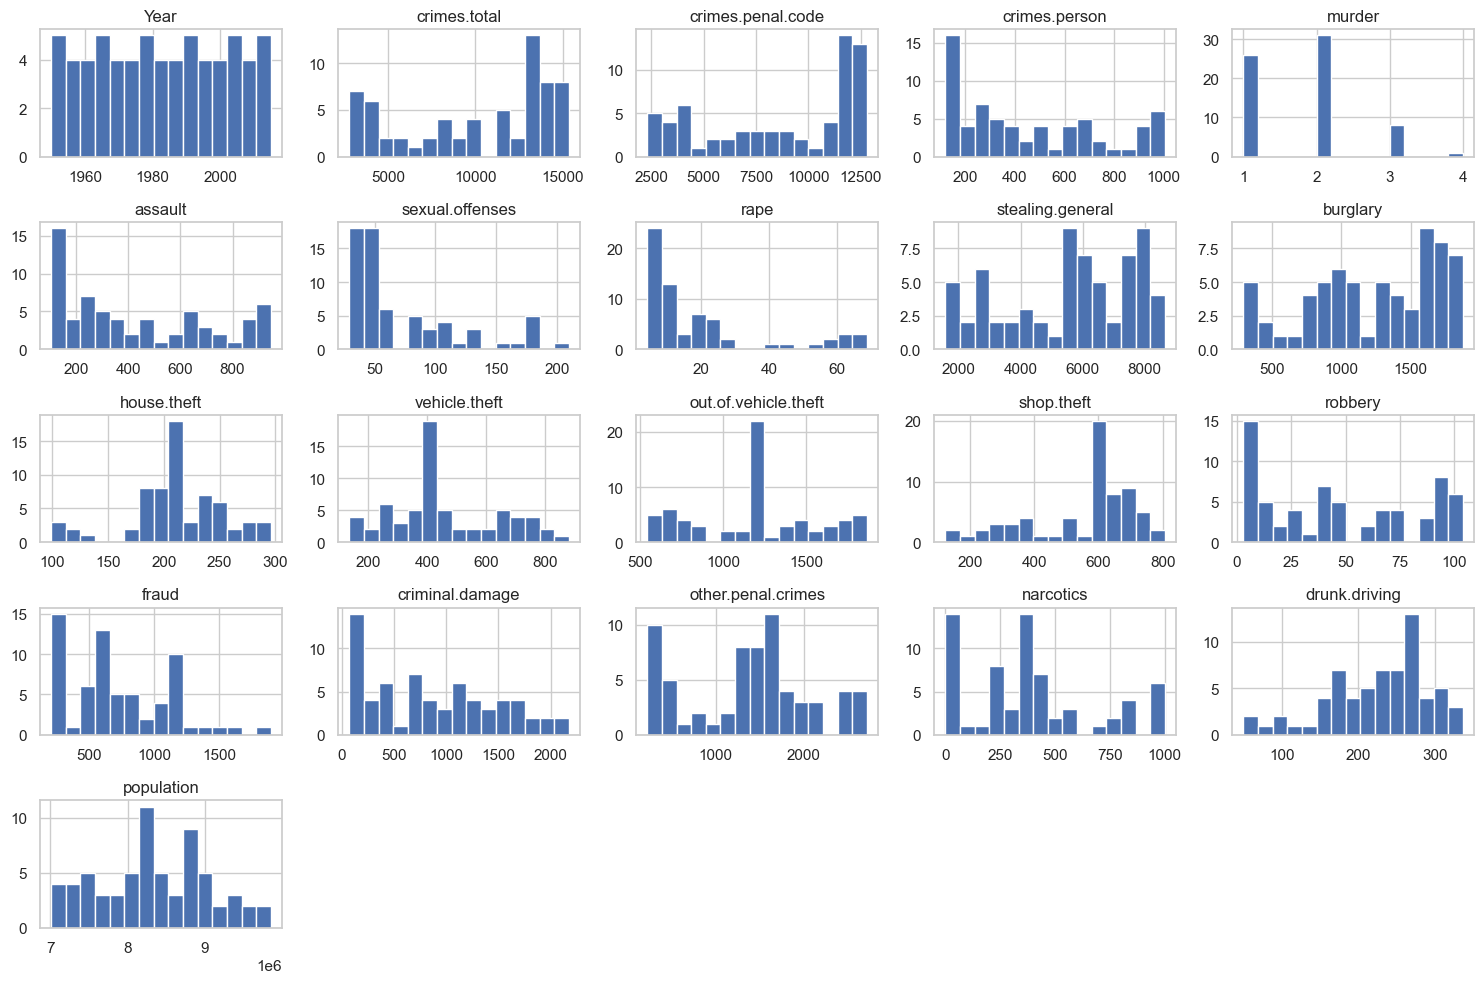

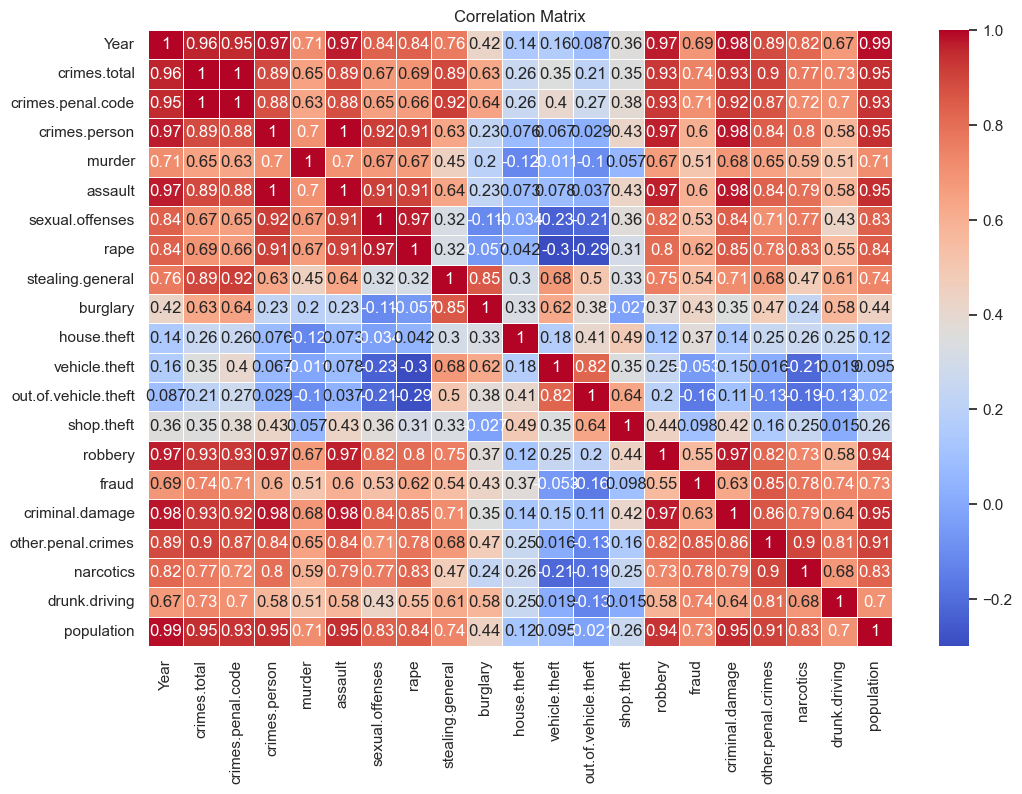

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)
def plot_histograms(df):
    df.hist(bins=15, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

plot_histograms(reported_data)
plot_correlation_matrix(reported_data)


Explanation:

Histograms: Visualizes the distribution of each numerical column, helping to understand the spread and identify outliers.
Correlation Matrix: Shows the correlation between different numerical columns, helping to identify potential relationships between variables.
Time Series Plot: Plots crimes.total over time to visualize trends and patterns.
Benefit:

Provides a comprehensive understanding of the data's distribution, relationships, and trends.
Helps identify which features are strongly correlated and may be useful for predictive modeling.

10. Feature Engineering
Objective: Create new features that could improve the model's performance.

In [22]:
# Feature Engineering
reported_data['Year'] = pd.to_datetime(reported_data['Year']).dt.year

# Aggregate similar features (example)
reported_data['total_thefts'] = reported_data['stealing.general'] + reported_data['burglary'] + reported_data['house.theft']

# Save the enhanced data
reported_data.to_csv('enhanced_reported_data.csv', index=False)


11. Model Training and Evaluation

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for supervised learning
X = reported_data.drop(columns=['Year', 'crimes.total'])
y = reported_data['crimes.total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}, Training R2: {train_r2}")
print(f"Testing MSE: {test_mse}, Testing R2: {test_r2}")


Training MSE: 59.833076537672056, Training R2: 0.999996256902618
Testing MSE: 215.85787256198233, Testing R2: 0.9999906313668099


12. Dimensionality Reduction and Clustering

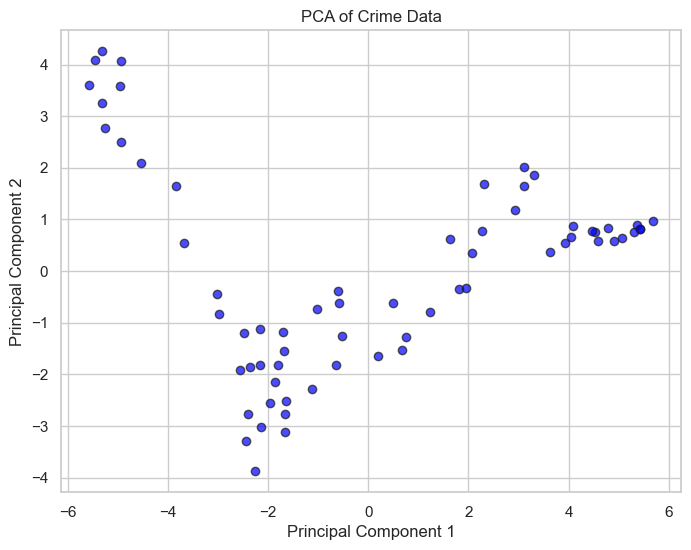

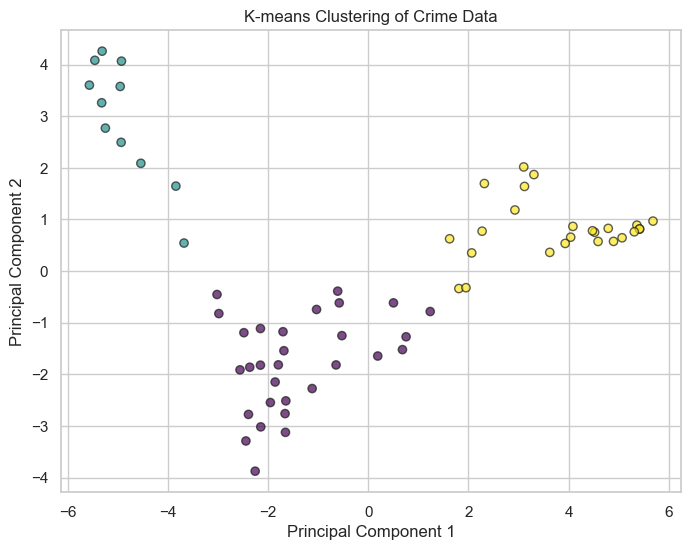

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Perform PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Crime Data')
plt.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Crime Data')
plt.show()


Explanation
Steps 1 to 8: Data Cleaning and Preparation
Loading the Data: We load the CSV file into a pandas DataFrame to work with it.
Exploring the Data: We examine the structure, summary statistics, and missing values to understand the dataset.
Handling Missing Values: We fill missing numerical values with the median and categorical values with the mode to maintain data integrity.
Removing Duplicates: Removing duplicate rows ensures that our data is unique and reliable.
Converting Data Types: Converting the 'Year' column to datetime allows for proper time series analysis.
Scaling Numerical Values: Standardizing numerical values ensures that they are on a similar scale, which is important for machine learning algorithms.
Encoding Categorical Variables: One-hot encoding converts categorical variables into a numerical format suitable for machine learning models.
Saving the Cleaned Data: Saving the cleaned data allows us to use it for further analysis and modeling.

Step 9: Exploratory Data Analysis (EDA)
Histograms and Correlation Matrix: These visualizations help us understand the distributions and relationships between variables, guiding feature selection and engineering.

Step 10: Feature Engineering
Creating New Features: We create new features, like total_thefts, to enhance the predictive power of our models.

Step 11: Model Training and Evaluation
Linear Regression Model: We train and evaluate a linear regression model to predict crime rates, providing insights into the relationships between features and the target variable.

Step 12: Dimensionality Reduction and Clustering
PCA: Principal Component Analysis reduces the dimensionality of our data, making it easier to visualize and interpret.
K-means Clustering: Clustering helps identify patterns and group similar data points, providing insights into underlying structures in the data.